In [3]:
# import package 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import cv2
from feature_extraction import *
from slide_window import *
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [5]:
####### CHANGE HERE WHEN USING DIFFERENT PARAMETER ########
add = './models_parameters/YCrCb_LinearSVC/'

###########################################################

# feature extraction
para = pickle.load( open(add + 'parameters.p', 'rb'))
addr = para["addr"]
model_name = para["model_name"]

color_space = para["color_space"] # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = para["orient"]  # HOG orientations
pix_per_cell = para["pix_per_cell"] # HOG pixels per cell
cell_per_block = para["cell_per_block"] # HOG cells per block
hog_channel = para["hog_channel"] # Can be 0, 1, 2, or "ALL"
spatial_size = para["spatial_size"] # Spatial binning dimensions
hist_bins = para["hist_bins"]    # Number of histogram bins
spatial_feat = para["spatial_feat"] # Spatial features on or off
hist_feat = para["hist_feat"]# Histogram features on or off
hog_feat = para["hog_feat"] # HOG features on or off


# import trained classifiers
model = pickle.load( open(addr + model_name, 'rb'))
svc = model["svc"]
X_scaler = model["X_scaler"]

D:\Applications\Miniconda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


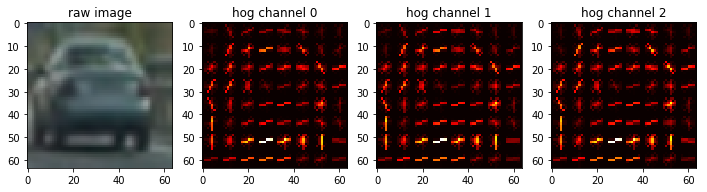

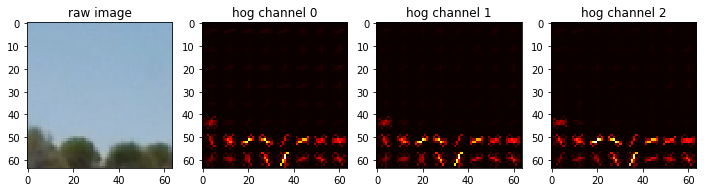

In [10]:
cars = glob.glob('vehicles/*/*.png')
noncars = glob.glob('non-vehicles/*/*.png')

i = np.random.randint(1,100)
image_1 = mpimg.imread(cars[i])
image_2 = mpimg.imread(noncars[i])

# car hog images
f0, chog_img0 = get_hog_features(image_1[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
f1, chog_img1 = get_hog_features(image_1[:,:,1], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
f2, chog_img2 = get_hog_features(image_1[:,:,2], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

car_imgs = [image_1, chog_img0, chog_img1, chog_img2]
car_titles =['raw image', 'hog channel 0', 'hog channel 1', 'hog channel 2']

# notcar hog images
f0, hog_img0 = get_hog_features(image_2[:,:,0], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
f1, hog_img1 = get_hog_features(image_2[:,:,1], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)
f2, hog_img2 = get_hog_features(image_2[:,:,2], orient, pix_per_cell, cell_per_block, vis=True, feature_vec=False)

notcar_imgs = [image_2, hog_img0, hog_img1, hog_img2]
notcar_titles =['raw image', 'hog channel 0', 'hog channel 1', 'hog channel 2']

fig = plt.figure(figsize=(12,24))
visualize(fig, 1,4, car_imgs, car_titles)

fig1 = plt.figure(figsize=(12,24))
visualize(fig1, 1,4, notcar_imgs, notcar_titles)
plt.show()


processing ./test_images\test1.jpg


D:\Applications\Miniconda\envs\carnd-term1\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


processing ./test_images\test2.jpg
processing ./test_images\test3.jpg
processing ./test_images\test4.jpg
processing ./test_images\test5.jpg
processing ./test_images\test6.jpg


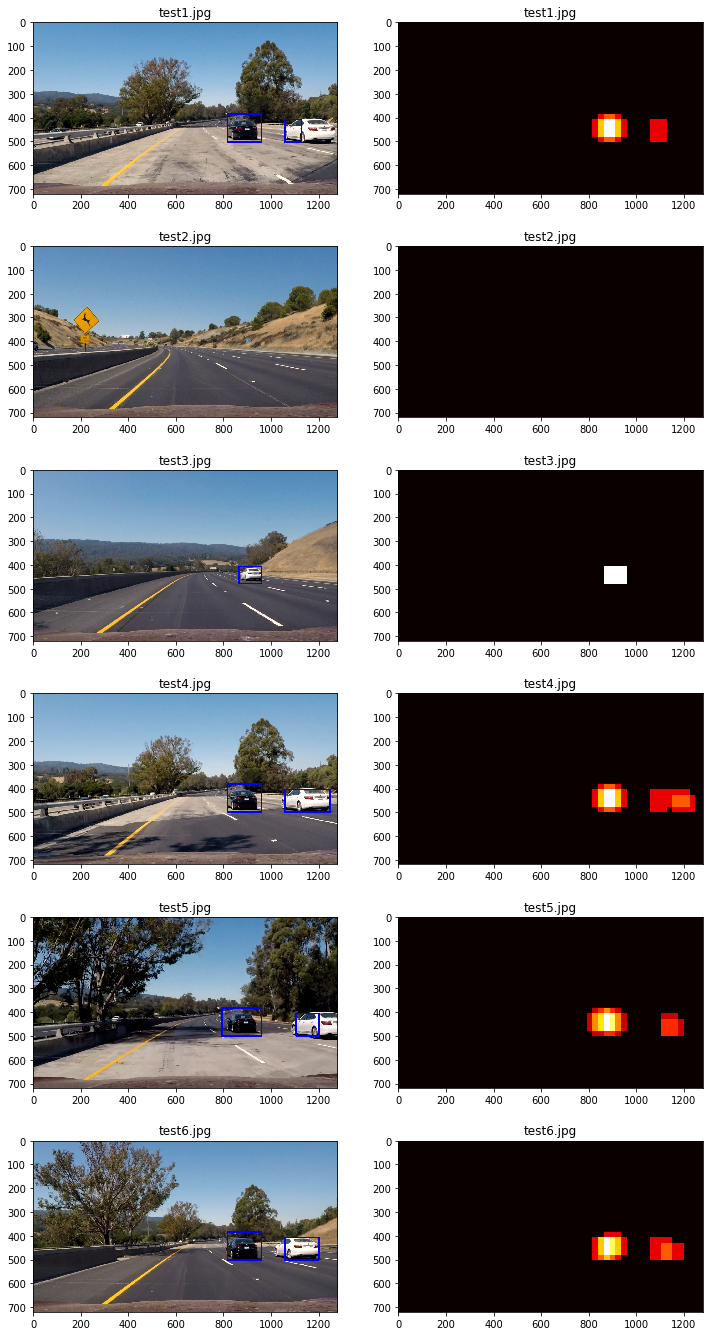

In [13]:
from scipy.ndimage.measurements import label
ystart = 360
ystop = 656
scale = [1.5,2]

out_images = []
out_maps = []
out_titles= []
out_boxes = []


test_imgs = glob.glob('./test_images/*.jpg')
for i in range(len(test_imgs)):
	print('processing', test_imgs[i])
	boxes = []
	image = mpimg.imread(test_imgs[i])
	out_img_1, boxes_1 = find_cars(image, ystart, ystop, 
                               scale[0], svc, X_scaler, 
							   orient, pix_per_cell, cell_per_block, 
							   spatial_size, hist_bins)
	boxes.extend(boxes_1)
    
	out_img_2, boxes_2 = find_cars(image, ystart, ystop, 
                               scale[1], svc, X_scaler, 
							   orient, pix_per_cell, cell_per_block, 
							   spatial_size, hist_bins)
    
	boxes.extend(boxes_2)
    
	heat = np.zeros_like(image[:,:,0]).astype(np.float)
	heat = add_heat(heat, boxes_1)
	# Apply threshold to help remove false positives
	heat = apply_thresh(heat,1)
	heatmap = np.clip(heat, 0, 255)
	labels = label(heatmap)
	draw_img = draw_labeled_bboxes(np.copy(image), labels)
    
    
	out_images.append(draw_img)
	out_images.append(heat)
	out_maps.append(heat)
	out_titles.append(test_imgs[i][14:])
	out_titles.append(test_imgs[i][14:])
    
# 	heat_2 = add_heat(heat, boxes_2)
# 	out_images.append(out_img_1)
# 	out_images.append(heat)
# 	out_maps.append(heat)
# 	out_titles.append(test_imgs[i][14:])
# 	out_titles.append(test_imgs[i][14:])
    

    
fig = plt.figure(figsize=(12,24))
visualize(fig, 6,2, out_images, out_titles)
plt.show()